In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline
np.random.seed(1)

/opt/homebrew/lib/python3.9/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

In [3]:
index = 6
X_train_orig.shape

(600, 64, 64, 3)

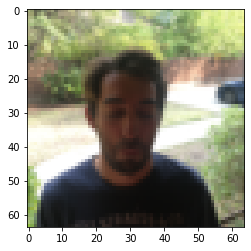

In [4]:
im = X_train_orig[index]
plt.imshow(im)
plt.show()

In [5]:
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [6]:
def happymodel():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(64, 64,3)),
        tfl.ZeroPadding2D(padding=3),
        tfl.Conv2D(filters=32, kernel_size=7, strides=1),
        tfl.BatchNormalization(axis=3, momentum=0.99, epsilon=0.001),
        tfl.ReLU(),
        tfl.MaxPool2D(),
        tfl.Flatten(),
        tfl.Dense(1, activation="sigmoid")  
    ])
    
    return model

In [7]:
happy_model = happymodel()
happy_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 70, 70, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                        

In [8]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10


2022-06-07 00:47:58.613488: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


38/38 [==============================] - 1s 20ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 2/10
38/38 [==============================] - 1s 21ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 3/10
38/38 [==============================] - 1s 20ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 4/10
38/38 [==============================] - 1s 20ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 5/10
38/38 [==============================] - 1s 21ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 6/10
38/38 [==============================] - 1s 21ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 7/10
38/38 [==============================] - 1s 21ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 8/10
38/38 [==============================] - 1s 21ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 9/10
38/38 [==============================] - 1s 21ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 10/10
38/38 [==============================] - 1s 21ms/step - loss: 0.0000e+00

In [9]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.4400


[0.0, 0.4399999976158142]

Easy, right? But what if you need to build a model with shared layers, branches, or multiple inputs and outputs? This is where Sequential, with its beautifully simple yet limited functionality, won't be able to help you.

In [10]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 4


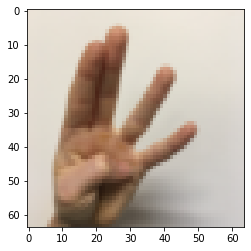

In [11]:
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [12]:
x = np.array([[[[0], [1], [2]]]])
print(x.shape)
print(np.squeeze(x).shape)
x, np.squeeze(x)

(1, 1, 3, 1)
(3,)


(array([[[[0],
          [1],
          [2]]]]),
 array([0, 1, 2]))

In [13]:
X_train = X_train_orig / 255.
X_test = X_test_orig / 255. 

Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [22]:
def convolutional_model(input_shape):
    
    input_img = tf.keras.Input(shape=input_shape)
    Z1 = tfl.Conv2D(filters=8, kernel_size=4, padding="same", strides=1)(input_img)
    A1 = tfl.ReLU()(Z1)
    
    P1 = tfl.MaxPool2D(pool_size=8, strides=8, padding="SAME")(A1)
    
    Z2 = tfl.Conv2D(filters=16, kernel_size=2, padding="same", strides=1)(P1)
    A2 = tfl.ReLU()(Z2)
    
    P2 = tfl.MaxPool2D(pool_size=4, strides=4, padding="SAME")(A2)
    
    F = tfl.Flatten()(P2)
    
    outputs = tfl.Dense(units=6, activation="softmax")(F)
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    
    return model


In [23]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

AttributeError: 'tuple' object has no attribute 'compile'

In [16]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)


Epoch 1/100
17/17 [==============================] - 0s 19ms/step - loss: 1.7982 - accuracy: 0.1731 - val_loss: 1.7862 - val_accuracy: 0.1750
Epoch 2/100
17/17 [==============================] - 0s 16ms/step - loss: 1.7846 - accuracy: 0.2139 - val_loss: 1.7769 - val_accuracy: 0.2750
Epoch 3/100
17/17 [==============================] - 0s 17ms/step - loss: 1.7749 - accuracy: 0.2843 - val_loss: 1.7673 - val_accuracy: 0.3083
Epoch 4/100
17/17 [==============================] - 0s 16ms/step - loss: 1.7656 - accuracy: 0.3361 - val_loss: 1.7577 - val_accuracy: 0.3750
Epoch 5/100
17/17 [==============================] - 0s 16ms/step - loss: 1.7565 - accuracy: 0.3435 - val_loss: 1.7475 - val_accuracy: 0.4167
Epoch 6/100
17/17 [==============================] - 0s 16ms/step - loss: 1.7464 - accuracy: 0.3759 - val_loss: 1.7355 - val_accuracy: 0.4083
Epoch 7/100
17/17 [==============================] - 0s 16ms/step - loss: 1.7337 - accuracy: 0.4056 - val_loss: 1.7226 - val_accuracy: 0.4083
Epoch 

In [17]:
history.history

{'loss': [1.7982250452041626,
  1.7845916748046875,
  1.7749481201171875,
  1.7656291723251343,
  1.7564644813537598,
  1.7463843822479248,
  1.7337411642074585,
  1.7193982601165771,
  1.7029145956039429,
  1.6838449239730835,
  1.661575198173523,
  1.6364898681640625,
  1.607306957244873,
  1.5752323865890503,
  1.5402476787567139,
  1.5027742385864258,
  1.46538507938385,
  1.427089810371399,
  1.388951301574707,
  1.3515021800994873,
  1.3149415254592896,
  1.2794090509414673,
  1.2447230815887451,
  1.2108350992202759,
  1.1766844987869263,
  1.14607572555542,
  1.1121878623962402,
  1.0797717571258545,
  1.049073576927185,
  1.0206191539764404,
  0.9922778010368347,
  0.9662184119224548,
  0.9410421252250671,
  0.9178428053855896,
  0.8950288891792297,
  0.8744946122169495,
  0.8540239930152893,
  0.834867000579834,
  0.8160157203674316,
  0.7986250519752502,
  0.7822033166885376,
  0.7661901712417603,
  0.7507422566413879,
  0.7366237640380859,
  0.722844123840332,
  0.710201084

/var/folders/11/9_0bxr017h92r81nbztybj540000gn/T/ipykernel_1086/2703544811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
/var/folders/11/9_0bxr017h92r81nbztybj540000gn/T/ipykernel_1086/2703544811.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

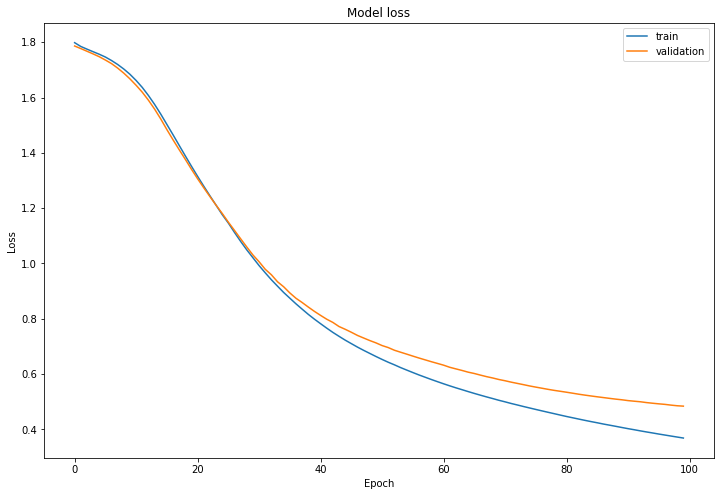

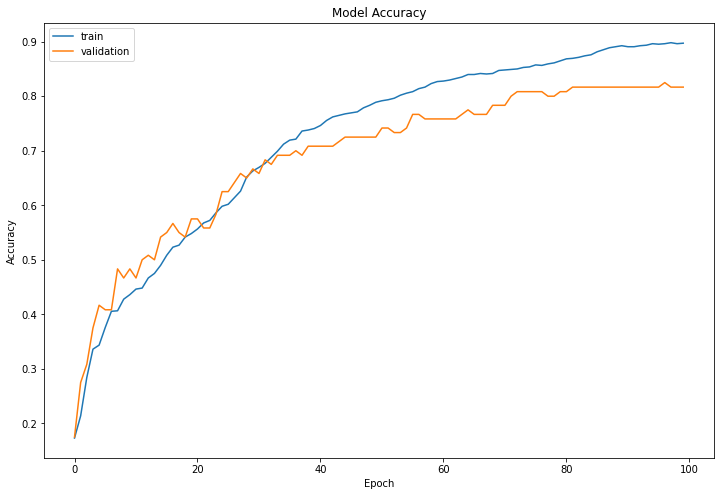

In [20]:
df_loss_acc = pd.DataFrame(history.history)
df_loss = df_loss_acc[['loss', 'val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')